In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/5_AIADVANCE')

In [ ]:
# !unzip /content/drive/MyDrive/5_AIADVANCE/GK_AI_Advance/dogs-vs-cats.zip -d /content/drive/MyDrive/5_AIADVANCE/GK_AI_Advance

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, concatenate, BatchNormalization, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Add
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import regularizers
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from imutils import paths
# import pandas as pd
# import random
# from sklearn.preprocessing import LabelEncoder
# from keras.preprocessing.image import img_to_array
# from keras.applications import imagenet_utils
# from keras.preprocessing.image import load_img
# from sklearn.model_selection import train_test_split

# import os
# import tensorflow as tf
# from keras.callbacks import ModelCheckpoint
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report , confusion_matrix
from keras.callbacks import ModelCheckpoint
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

In [5]:
# Splitting the data between train and test
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


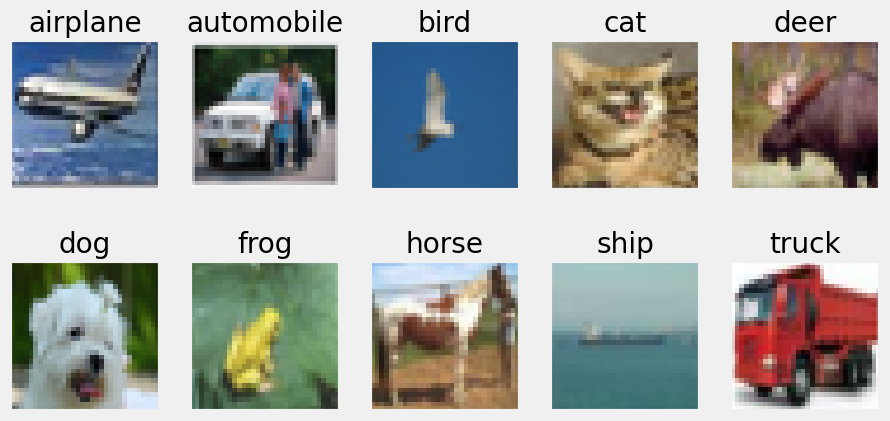

In [6]:
# plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
# Tạo thư mục để lưu ảnh
save_dir = "./saved_images/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)

    pil_image = Image.fromarray(im)
    filename = os.path.join(save_dir, f"{class_names[i]}_{img_num}.png")
    pil_image.save(filename)

plt.show()

In [ ]:
# from PIL import Image
# import os

# # Tạo thư mục để lưu ảnh
# save_dir = "./saved_images/"
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# # Lặp qua từng lớp
# for i in range(num_classes):
#     idx = np.where(y_train[:]==i)[0]
#     features_idx = x_train[idx,::]
#     img_num = np.random.randint(features_idx.shape[0])
#     img = (features_idx[img_num,::])

#     # Tạo tên tệp cho ảnh
#     filename = os.path.join(save_dir, f"{class_names[i]}_{img_num}.png")

#     # Tạo đối tượng Image từ mảng numpy
#     img = Image.fromarray((img * 255).astype(np.uint8))

#     # Lưu ảnh
#     img.save(filename)

# print("Các ảnh đã được lưu thành công vào thư mục:", save_dir)

Các ảnh đã được lưu thành công vào thư mục: ./saved_images/


In [ ]:
# from PIL import Image
# import os

# # Đường dẫn đến thư mục chứa các ảnh đã lưu
# saved_images_dir = "./saved_images/"

# # Lặp qua từng tệp trong thư mục
# for filename in os.listdir(saved_images_dir):
#     # Đường dẫn đầy đủ của tệp
#     filepath = os.path.join(saved_images_dir, filename)

#     # Đọc ảnh từ tệp
#     img = Image.open(filepath)

#     # # Chuyển đổi ảnh về dạng mảng numpy và chuẩn hóa về đoạn [0, 1]
#     # img_array = np.array(img) / 255.0

#     # Hiển thị ảnh hoặc thực hiện các thao tác tiếp theo tùy ý

#     # Ví dụ: hiển thị ảnh
#     plt.imshow(img)
#     plt.title(filename)
#     plt.axis('off')
#     plt.show()

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

#### Tiền xử lí dữ liệu

In [ ]:
# root_dir = '/content/drive/MyDrive/5_AIADVANCE/GK_AI_Advance/'

# # Đường dẫn tới thư mục con 'train', 'val' và 'test'
# train_dir = os.path.join(root_dir, 'train')
# val_dir = os.path.join(root_dir, 'val')
# test_dir = os.path.join(root_dir, 'test')

## Cur

In [ ]:
# img_size = (224 , 224)
# batch_size = 8
# img_shape = (img_size[0] , img_size[1] , 3)

# tr_gen = ImageDataGenerator()
# ts_gen = ImageDataGenerator()

# train_gen = tr_gen.flow_from_directory(train_dir , target_size = img_size , class_mode = 'binary' ,
#                                        color_mode = 'rgb' , shuffle = True , batch_size = batch_size)

# valid_gen = ts_gen.flow_from_directory(val_dir , target_size = img_size , class_mode = 'binary' ,
#                                        color_mode = 'rgb' , shuffle = True , batch_size = batch_size)

# test_gen = ts_gen.flow_from_directory(test_dir , target_size = img_size , class_mode = 'binary' ,
#                                        color_mode = 'rgb' , shuffle = False , batch_size = batch_size)

Found 3499 images belonging to 2 classes.
Found 892 images belonging to 2 classes.
Found 244 images belonging to 2 classes.


In [ ]:
# # Lấy các đường dẫn đến ảnh.
# # image_path = list(paths.list_images('data/dogs-vs-cats/train/train'))
# image_path = list(paths.list_images('/content/drive/MyDrive/5_AIADVANCE/GK_AI_Advance/dogs-vs-cats'))

# # Đổi vị trí ngẫu nhiên các đường dẫn ảnh
# random.shuffle(image_path)

# # Chỉ lấy 5000 dòng đầu tiên (5000 ảnh)
# # image_path = image_path[:5000]
# # print(image_path)

In [ ]:
# labels = [p.split(os.path.sep)[-1] for p in image_path]
# labels = [label.split('.')[-3] for label in labels]
# print(labels)
# # Chuyển tên các loài hoa thành số
# le = LabelEncoder()
# labels = le.fit_transform(labels)
# print(labels)

['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat'

In [ ]:
# # Load ảnh và resize về đúng kích thước mà VGG 16 cần là (224,224)
# list_image = []
# for (j, imagePath) in enumerate(image_path):
#     # Load ảnh và resize về kích thước (224, 224)
#     image = load_img(imagePath, target_size=(224, 224))

#     # Chuyển ảnh thành mảng numpy
#     image = img_to_array(image)

#     # Mở rộng chiều của mảng numpy
#     image = np.expand_dims(image, 0)

#     # Tiền xử lý ảnh theo tiêu chuẩn của mô hình VGG16
#     image = imagenet_utils.preprocess_input(image)

#     # Thêm ảnh đã tiền xử lý vào danh sách
#     list_image.append(image)

# # Chuyển danh sách các ảnh thành mảng numpy một chiều
# list_image = np.vstack(list_image)

In [ ]:
# print(list_image.shape)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(list_image, labels, test_size=0.2, random_state=42)

#### Xây dựng Model

In [8]:
import tensorflow as tf
from tensorflow.keras import layers

class Block(tf.keras.Model):
    def __init__(self, in_channels, out_channels, expansion, strides):
        super(Block, self).__init__()
        self.strides = strides
        channels = expansion * in_channels

        self.conv1 = layers.Conv2D(channels, kernel_size=1, use_bias=False)
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(channels, kernel_size=3, strides=strides, padding='same',
                                   groups=channels, use_bias=False)
        self.bn2 = layers.BatchNormalization()
        self.conv3 = layers.Conv2D(out_channels, kernel_size=1, use_bias=False)
        self.bn3 = layers.BatchNormalization()

        if strides == 1 and in_channels != out_channels:
            self.shortcut = tf.keras.Sequential([
                layers.Conv2D(out_channels, kernel_size=1, use_bias=False),
                layers.BatchNormalization()
            ])
        else:
            self.shortcut = lambda x: x

    def call(self, x):
        out = tf.keras.activations.relu(self.bn1(self.conv1(x)))
        out = tf.keras.activations.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out = layers.add([self.shortcut(x), out]) if self.strides==1 else out
        return out

class MobileNetV2(tf.keras.Model):
    config = [(1, 16, 1, 1),
              (6, 24, 2, 1),
              (6, 32, 3, 2),
              (6, 64, 4, 2),
              (6, 96, 3, 1),
              (6, 160, 3, 2),
              (6, 320, 1, 1)]

    def __init__(self, num_classes):
        super(MobileNetV2, self).__init__()
        self.conv1 = layers.Conv2D(32, kernel_size=3, padding='same', use_bias=False)
        self.bn1 = layers.BatchNormalization()
        self.layer = self._make_layers(in_channels=32)
        self.conv2 = layers.Conv2D(1280, kernel_size=1, use_bias=False)
        self.bn2 = layers.BatchNormalization()
        self.avg_pool2d = layers.AveragePooling2D(pool_size=4)
        self.flatten = layers.Flatten()
        self.fc = layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        out = tf.keras.activations.relu(self.bn1(self.conv1(x)))
        out = self.layer(out)
        out = tf.keras.activations.relu(self.bn2(self.conv2(out)))
        out = self.avg_pool2d(out)
        out = self.flatten(out)
        out = self.fc(out)
        return out

    def _make_layers(self, in_channels):
        layer = []
        for expansion, out_channels, num_blocks, strides in self.config:
            stride = [strides] + [1]*(num_blocks-1)
            for s in stride:
                layer += [Block(in_channels, out_channels, expansion, s)]
                in_channels = out_channels
        return tf.keras.Sequential(layer)

In [9]:
mobileNetV2 = MobileNetV2(num_classes = 10)

In [10]:
mobileNetV2.build((1, 32, 32, 3))
mobileNetV2.summary()

Model: "mobile_net_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  864       
                                                                 
 batch_normalization (Batch  multiple                  128       
 Normalization)                                                  
                                                                 
 sequential_4 (Sequential)   (1, 4, 4, 320)            1903488   
                                                                 
 conv2d_56 (Conv2D)          multiple                  409600    
                                                                 
 batch_normalization_56 (Ba  multiple                  5120      
 tchNormalization)                                               
                                                                 
 average_pooling2d (Average  multiple                

## Training

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [13]:
# compile (Hidden Output)
mobileNetV2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
epochs=1

# Training the model
history = mobileNetV2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

1563/1563 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9870
Epoch 1: val_loss improved from inf to 0.61982, saving model to models_new/model-MobileNetV2-001.keras
1563/1563 [==============================] - 104s 66ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.6198 - val_accuracy: 0.8608


In [ ]:
mobileNetV2.save_weights('my_model_weights.h5')

In [ ]:
# Lưu mô hình
mobileNetV2.save("mobileNetV2_model")

# Hoặc bạn có thể chỉ lưu trọng số:
mobileNetV2.save_weights("mobileNetV2_weights")

In [ ]:
# Tải mô hình
mobileNetV2 = tf.keras.models.load_model("mobileNetV2_model")

# # Hoặc nếu bạn chỉ lưu trọng số, bạn cần tạo một mô hình mới và tải trọng số vào đó:
# loaded_model = MobileNetV2(num_classes=10)
# loaded_model.build((1, 32, 32, 3))
# loaded_model.load_weights("mobileNetV2_weights")

In [19]:
# Save the weights
mobileNetV2.save_weights("mobileNetV2_weights.h5")

In [16]:
# Load the weights
mobileNetV2.load_weights("my_model_weights.h5")

In [ ]:
import matplotlib.pyplot as plt

# Lấy các giá trị accuracy và loss từ lịch sử huấn luyện
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Vẽ biểu đồ accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Vẽ biểu đồ loss
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
score = loaded_model.evaluate(x_test, y_test, verbose=1)
print(score)

313/313 [==============================] - 15s 24ms/step - loss: 0.6851 - accuracy: 0.8310
[0.6850815415382385, 0.8309999704360962]


In [ ]:
score = mobileNetV2.evaluate(x_test, y_test, verbose=1)
print(score)

313/313 [==============================] - 9s 20ms/step - loss: 0.6851 - accuracy: 0.8310
[0.6850815415382385, 0.8309999704360962]


In [ ]:
# Đánh giá model
preds = mobileNetV2.predict(x_test) # DỰ ĐOÁN VÀ ĐÁNH GIÁ
preds = np.argmax(preds, axis=1)
y_test_label = np.argmax(y_test, axis=1)
print(y_test[0])
print(preds[0])
print(classification_report(y_test_label, preds))

313/313 [==============================] - 4s 12ms/step
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.94      0.93      0.93      1000
           2       0.84      0.75      0.79      1000
           3       0.69      0.72      0.70      1000
           4       0.86      0.79      0.82      1000
           5       0.68      0.81      0.74      1000
           6       0.85      0.92      0.88      1000
           7       0.89      0.88      0.88      1000
           8       0.97      0.82      0.89      1000
           9       0.92      0.93      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



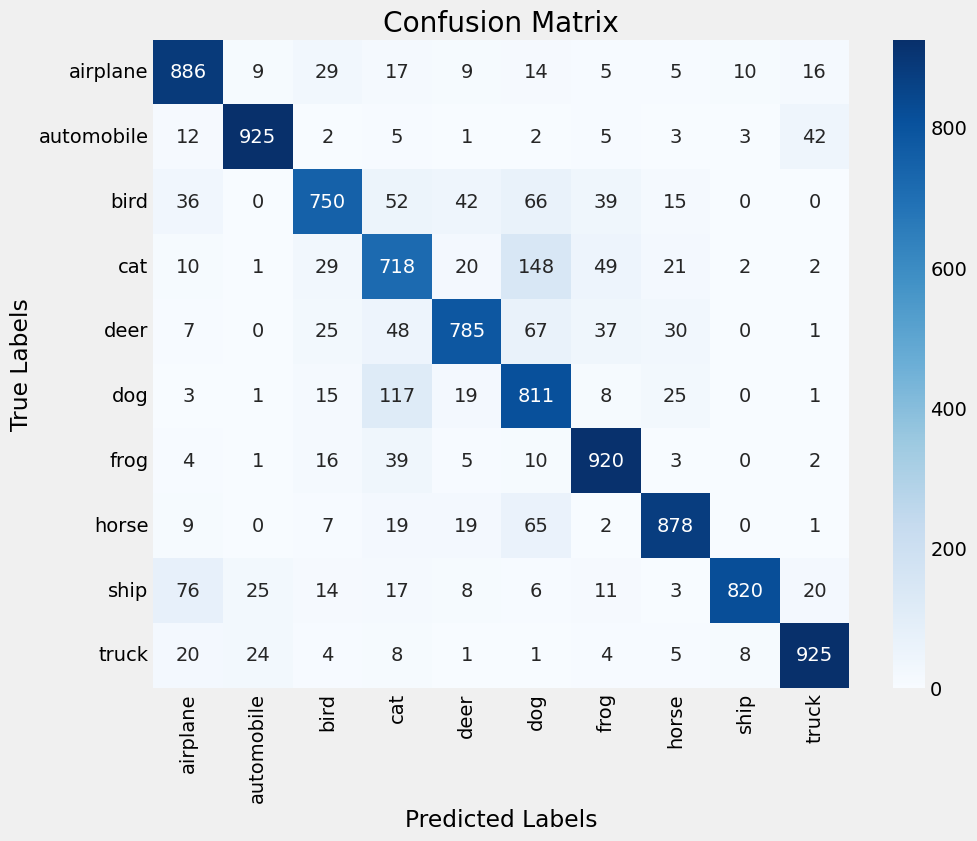

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test_label, preds)

# Hiển thị ma trận nhầm lẫn bằng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Predict

1/1 [==============================] - 7s 7s/step
Giá trị dự đoán:  0


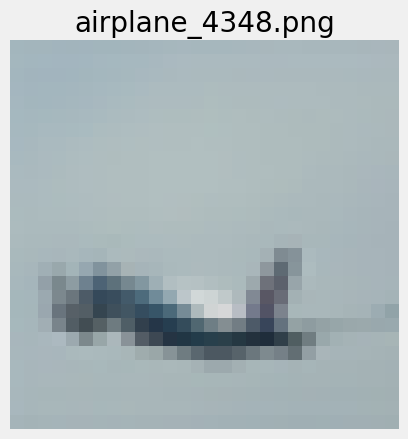

1/1 [==============================] - 0s 29ms/step
Giá trị dự đoán:  1


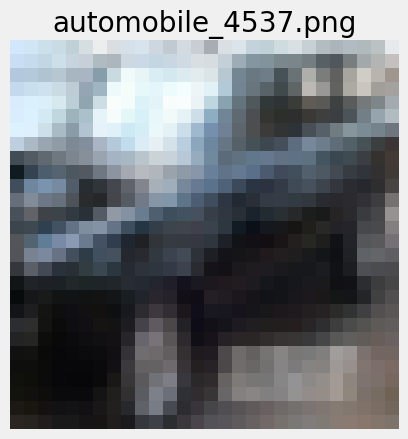

1/1 [==============================] - 0s 39ms/step
Giá trị dự đoán:  2


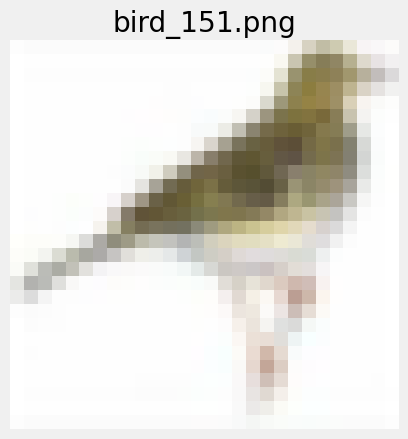

1/1 [==============================] - 0s 26ms/step
Giá trị dự đoán:  3


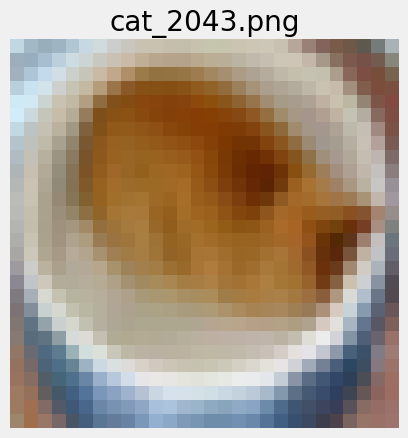

1/1 [==============================] - 0s 27ms/step
Giá trị dự đoán:  4


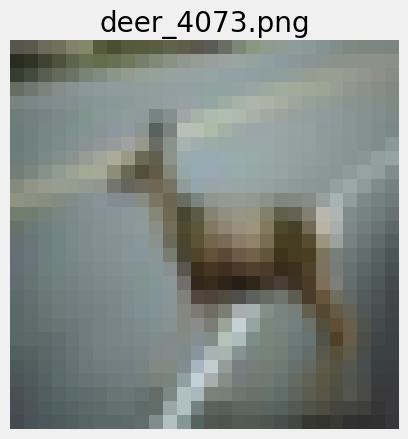

1/1 [==============================] - 0s 28ms/step
Giá trị dự đoán:  5


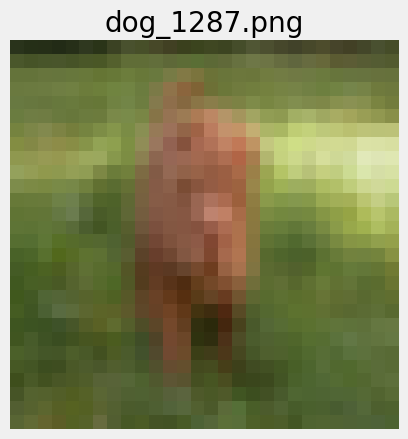

1/1 [==============================] - 0s 26ms/step
Giá trị dự đoán:  6


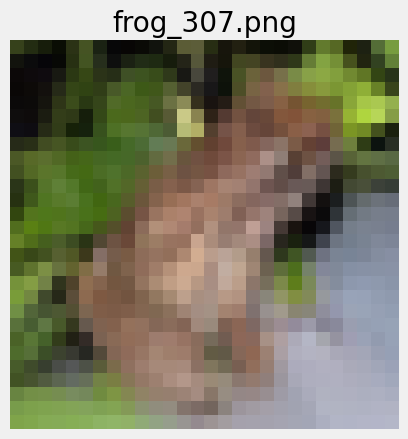

1/1 [==============================] - 0s 28ms/step
Giá trị dự đoán:  7


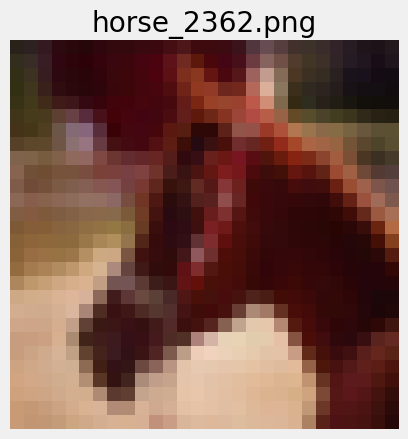

1/1 [==============================] - 0s 27ms/step
Giá trị dự đoán:  8


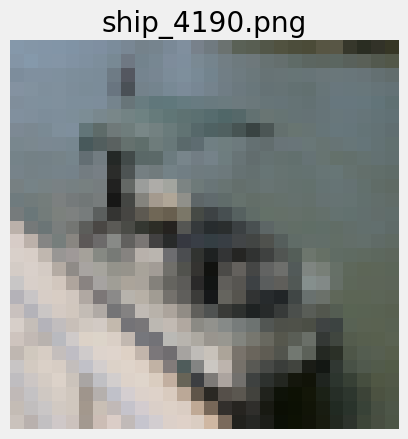

1/1 [==============================] - 0s 27ms/step
Giá trị dự đoán:  1


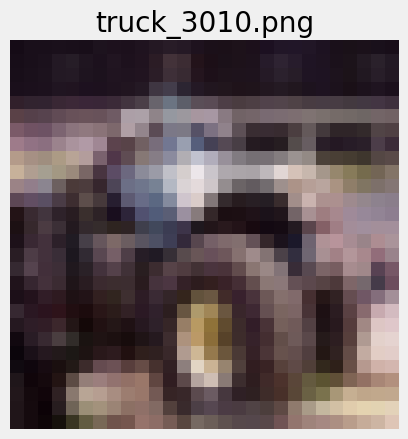

In [ ]:
from PIL import Image
import os
import cv2

# Đường dẫn đến thư mục chứa các ảnh đã lưu
saved_images_dir = "./saved_images/"

# Lặp qua từng tệp trong thư mục
for filename in os.listdir(saved_images_dir):
    # Đường dẫn đầy đủ của tệp
    filepath = os.path.join(saved_images_dir, filename)

    # Đọc ảnh từ tệp
    img = Image.open(filepath)
    img = np.array(img)
    img = cv2.resize(img, (28, 28))

    # # Chuyển đổi ảnh về dạng mảng numpy và chuẩn hóa về đoạn [0, 1]
    # img.astype('float32')
    img_array = np.array(img) / 255.0
    # Hiển thị ảnh hoặc thực hiện các thao tác tiếp theo tùy ý

    # Ví dụ: hiển thị ảnh
    plt.imshow(img)
    y_predict = loaded_model.predict(np.expand_dims(img_array, axis=0))
    print('Giá trị dự đoán: ', np.argmax(y_predict))
    plt.title(filename)
    plt.axis('off')
    plt.show()

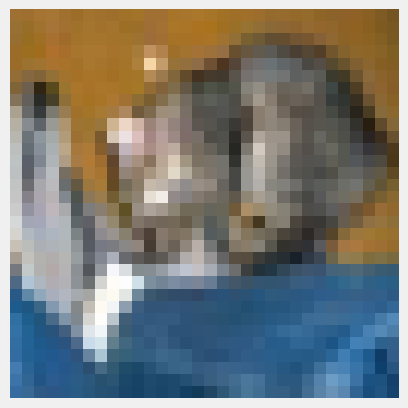

1/1 [==============================] - 0s 249ms/step
Giá trị dự đoán:  3


In [ ]:
# 10. Dự đoán ảnh
plt.imshow(x_test[0])
plt.axis('off')
plt.show()

y_predict = loaded_model.predict(np.expand_dims(x_test[0], axis=0))
print('Giá trị dự đoán: ', np.argmax(y_predict))

#### Fit model

In [ ]:
print(len(x_test))
print(x_test[0].shape)

10000
(32, 32, 3)


In [ ]:
# Tạo đối tượng optimizer  # SGD
optimizer = tf.keras.optimizers.Adam()

# Thiết lập ModelCheckpoint
save_best_only = True
checkpoint = ModelCheckpoint('models/model-MobileNetV2-{epoch:03d}.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=save_best_only,
                             mode='auto')

# Xây dựng quy trình huấn luyện
mobileNetV2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình với dữ liệu đã chuẩn bị
# H = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2, callbacks=[checkpoint])
H = mobileNetV2.fit(
    train_gen,
    steps_per_epoch = train_gen.samples // train_gen.batch_size,
    validation_data = valid_gen,
    validation_steps = valid_gen.samples // valid_gen.batch_size,
    epochs = 20,
    callbacks=[checkpoint]
)

In [ ]:
# Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy') # sử dụng từ khóa accuracy thay vì acc
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy') # sử dụng từ khóa val_accuracy thay vì val_acc
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
from keras.models import load_model
model = load_model('models/model-ResNet50-009.keras')

score = model.evaluate(X_test, y_test, verbose=1)
print(score)

In [ ]:
model.summary()

In [ ]:
# Đánh giá model
preds = model.predict(X_test) # DỰ ĐOÁN VÀ ĐÁNH GIÁ
preds = np.argmax(preds, axis=1)
print(classification_report(y_test, preds))

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [ ]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, preds)

# Chuyển nhãn số thành tên
label_names = le.inverse_transform(np.unique(y_test))
label_names = [label.split('/')[-1] for label in label_names]
# Sắp xếp lại ma trận nhầm lẫn
sorted_cm = cm[np.argsort(label_names)][:, np.argsort(label_names)]

# Tạo dataframe từ ma trận nhầm lẫn đã sắp xếp lại
df_cm = pd.DataFrame(sorted_cm, index=label_names, columns=label_names)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
